<a href="https://colab.research.google.com/github/devmitrasharmaa/PRODIGY_DS_04/blob/main/Sentiment_Analtysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SENTIMENT PATTERN ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('twitter_training.csv',header=None)

In [3]:
val_df=pd.read_csv('twitter_validation.csv',header=None)

In [4]:
df.columns=['id','entity','sentiment','text']
val_df.columns=['id','entity','sentiment','text']

In [5]:
df

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


#**Basic Visualization**

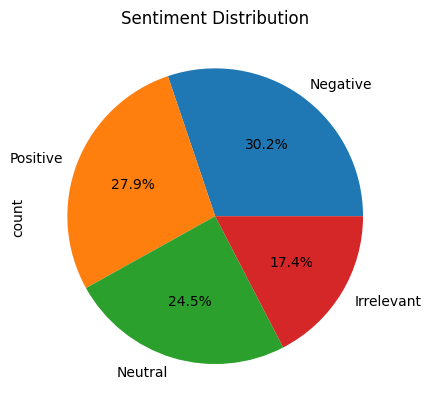

In [12]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
# plot1 = df.groupby(['entity', 'sentiment']).size().reset_index(name='id')
plot1=df.groupby(['entity', 'sentiment']).count().reset_index()

In [ ]:
plot1

,entity,sentiment,id,text
0,Amazon,Irrelevant,192,186
1,Amazon,Negative,576,575
2,Amazon,Neutral,1236,1207
3,Amazon,Positive,312,308
4,ApexLegends,Irrelevant,192,192
...,...,...,...,...
123,Xbox(Xseries),Positive,792,785
124,johnson&johnson,Irrelevant,198,197
125,johnson&johnson,Negative,846,845
126,johnson&johnson,Neutral,1014,1013


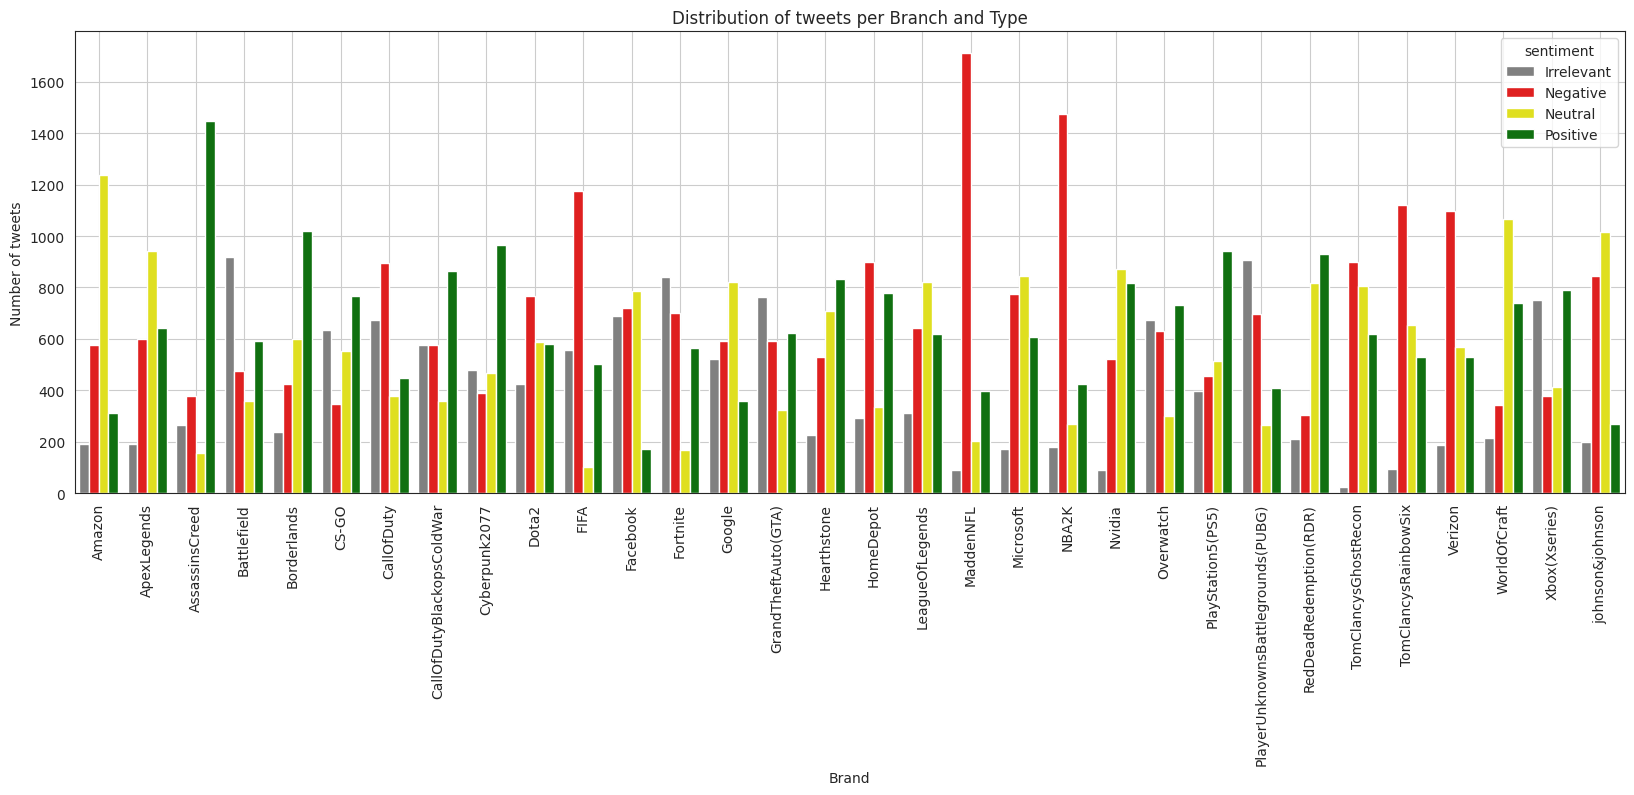

In [ ]:
palette = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'yellow',
    'Irrelevant': 'grey'
}
sns.set_style("white")

# Plot the barplot
plt.figure(figsize=(20, 6))
sns.barplot(data=plot1, x="entity", y="id", hue='sentiment', palette=palette)
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type")
plt.show()

#**Word Cloud**

In [ ]:
import nltk
import re
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['text'] = df['text'].fillna('').astype(str)

In [ ]:
nltk_stopwords = set(stopwords.words('english'))
additional_stopwords = {"twitter", "game", "pic", "unk"}  # Removed trailing spaces
all_stopwords = nltk_stopwords.union(additional_stopwords)

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b(?:' + '|'.join(re.escape(word) for word in all_stopwords) + r')\b', '', text)  # Remove stopwords
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    words = text.split()
    words = [word for word in words if word not in string.punctuation]
    return ' '.join(words)

In [ ]:
df['clean_text']= df['text'].apply(preprocess_text)

In [ ]:
def generate_wordcloud(sentiment):
  words =' '.join(df[df['sentiment']==sentiment]['clean_text'])
  wordcloud= WordCloud(width=800, height=500, background_color='white').generate(words)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for {sentiment} Tweets')
  plt.show()

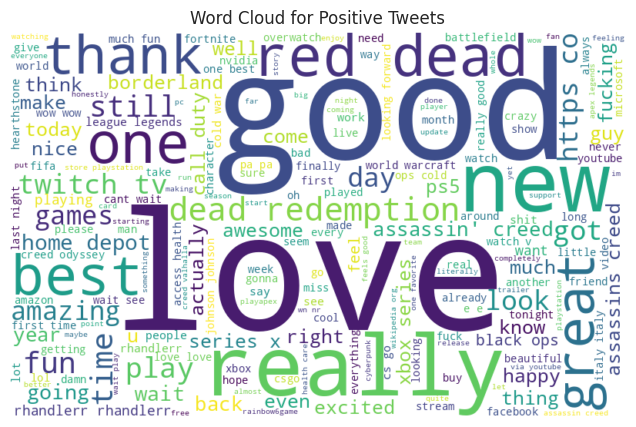

In [ ]:
generate_wordcloud('Positive')

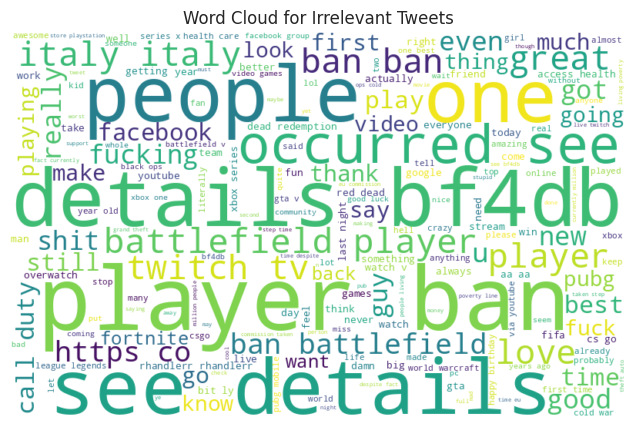

In [ ]:
generate_wordcloud('Irrelevant')

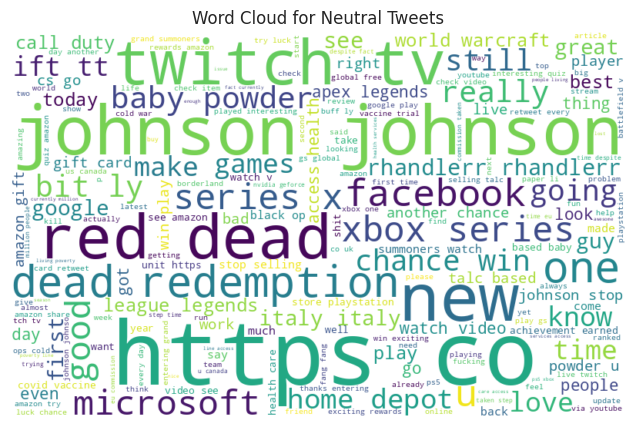

In [ ]:
generate_wordcloud('Neutral')

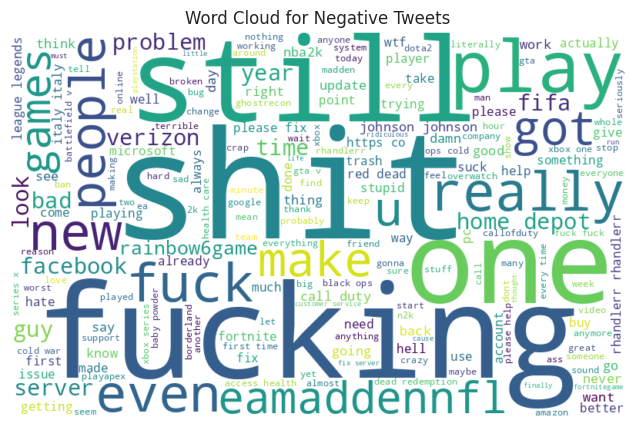

In [ ]:
generate_wordcloud('Negative')

#**Categorical bifurcation of Entites**
## Conclusion
- Gaming sector seem to be more reactive(react with positives and negatives)
-Gaming Consoles have good tweets and positivity.
-Pharmaceutical Companies have more neutral and negatives tweets
-Retail also show gaming sector type behavior but more reactive.
-Social Media has least positivity.
-Tech companies have Goof neutal tweets
- Telecommunication has most negativity around all sectors.

In [ ]:
plot1['entity'].unique()

array(['Amazon', 'ApexLegends', 'AssassinsCreed', 'Battlefield',
       'Borderlands', 'CS-GO', 'CallOfDuty', 'CallOfDutyBlackopsColdWar',
       'Cyberpunk2077', 'Dota2', 'FIFA', 'Facebook', 'Fortnite', 'Google',
       'GrandTheftAuto(GTA)', 'Hearthstone', 'HomeDepot',
       'LeagueOfLegends', 'MaddenNFL', 'Microsoft', 'NBA2K', 'Nvidia',
       'Overwatch', 'PlayStation5(PS5)',
       'PlayerUnknownsBattlegrounds(PUBG)', 'RedDeadRedemption(RDR)',
       'TomClancysGhostRecon', 'TomClancysRainbowSix', 'Verizon',
       'WorldOfCraft', 'Xbox(Xseries)', 'johnson&johnson'], dtype=object)

In [ ]:
category_mapping = {
    'ApexLegends': 'Games',
    'AssassinsCreed': 'Games',
    'Battlefield': 'Games',
    'Borderlands': 'Games',
    'CS-GO': 'Games',
    'CallOfDuty': 'Games',
    'CallOfDutyBlackopsColdWar': 'Games',
    'Cyberpunk2077': 'Games',
    'Dota2': 'Games',
    'FIFA': 'Games',
    'Fortnite': 'Games',
    'GrandTheftAuto(GTA)': 'Games',
    'Hearthstone': 'Games',
    'LeagueOfLegends': 'Games',
    'MaddenNFL': 'Games',
    'NBA2K': 'Games',
    'Overwatch': 'Games',
    'PlayerUnknownsBattlegrounds(PUBG)': 'Games',
    'RedDeadRedemption(RDR)': 'Games',
    'TomClancysGhostRecon': 'Games',
    'TomClancysRainbowSix': 'Games',
    'WorldOfCraft': 'Games',
    'Amazon': 'Tech Companies',
    'Google': 'Tech Companies',
    'Microsoft': 'Tech Companies',
    'Nvidia': 'Tech Companies',
    'Facebook': 'Social Media',
    'PlayStation5(PS5)': 'Gaming Consoles',
    'Xbox(Xseries)': 'Gaming Consoles',
    'HomeDepot': 'Retail',
    'Verizon': 'Telecommunications',
    'johnson&johnson': 'Pharmaceutical'
}

df['category'] = df['entity'].map(category_mapping)

In [ ]:
df

,id,entity,sentiment,text,category
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,Games
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,Games
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,Games
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,Games
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,Games
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Tech Companies
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Tech Companies
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Tech Companies
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,Tech Companies


In [ ]:
new_df=df.groupby(['category','sentiment']).size().reset_index(name='id')

In [ ]:
new_df

,category,sentiment,id
0,Games,Irrelevant,9498
1,Games,Negative,15678
2,Games,Neutral,10908
3,Games,Positive,15252
4,Gaming Consoles,Irrelevant,1146
5,Gaming Consoles,Negative,834
6,Gaming Consoles,Neutral,930
7,Gaming Consoles,Positive,1734
8,Pharmaceutical,Irrelevant,198
9,Pharmaceutical,Negative,846


Normalisation of categorical entities

In [ ]:
category_totals = new_df.groupby('category')['id'].sum().reset_index(name='total')

new_df = new_df.merge(category_totals, on='category')

new_df['proportion'] = (new_df['id'] / new_df['total'])*100

print(new_df)


              category   sentiment     id  total  proportion
0                Games  Irrelevant   9498  51336   18.501636
1                Games    Negative  15678  51336   30.539972
2                Games     Neutral  10908  51336   21.248247
3                Games    Positive  15252  51336   29.710145
4      Gaming Consoles  Irrelevant   1146   4644   24.677003
5      Gaming Consoles    Negative    834   4644   17.958656
6      Gaming Consoles     Neutral    930   4644   20.025840
7      Gaming Consoles    Positive   1734   4644   37.338501
8       Pharmaceutical  Irrelevant    198   2328    8.505155
9       Pharmaceutical    Negative    846   2328   36.340206
10      Pharmaceutical     Neutral   1014   2328   43.556701
11      Pharmaceutical    Positive    270   2328   11.597938
12              Retail  Irrelevant    294   2310   12.727273
13              Retail    Negative    900   2310   38.961039
14              Retail     Neutral    336   2310   14.545455
15              Retail  

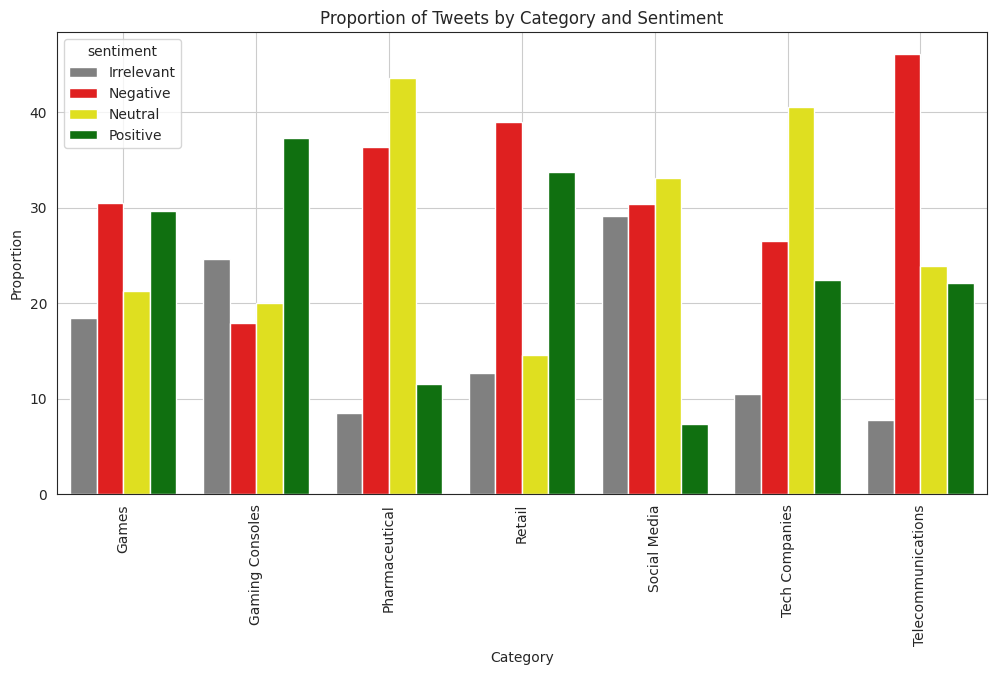

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='proportion', hue='sentiment', data=new_df, palette=palette)
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.title('Proportion of Tweets by Category and Sentiment')
plt.show()

#**Comparision**

Before comparision between VADER score and Given Sentiment, we'll remove irrelevant data, because it could affect the outcome

In [ ]:
df.drop(df[df['sentiment']=='Irrelevant'].index, inplace=True)

In [ ]:
df

,id,entity,sentiment,text,clean_text,vader_sentiment_score,vader_sentiment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder,-0.6908,Negative
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill,-0.6908,Negative
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill,-0.6908,Negative
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder,-0.6908,Negative
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder,-0.6908,Negative
...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like 6 years be...,0.0772,Positive
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition 6 years behind n...,-0.2960,Negative
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac 6 years behind ...,-0.2960,Negative
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like 6 years be...,0.0772,Positive


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']


df['vader_sentiment_score'] = df['text'].apply(get_sentiment_score)

df['vader_sentiment'] = df['vader_sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df[df['sentiment']!=df['vader_sentiment']]

,id,entity,sentiment,text,clean_text,vader_sentiment_score,vader_sentiment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder,-0.6908,Negative
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill,-0.6908,Negative
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill,-0.6908,Negative
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder,-0.6908,Negative
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder,-0.6908,Negative
...,...,...,...,...,...,...,...
74659,9197,Nvidia,Neutral,"Nvidia plans to release its 2017 ""Crypto Craze...","nvidia plans release 2017 ""crypto craze"" docum...",-0.1531,Negative
74660,9197,Nvidia,Neutral,"Nvidia does not want to give up its ""cryptoins...","nvidia want give ""cryptoinsanity"" doxmaxbit.cc...",-0.0572,Negative
74662,9197,Nvidia,Neutral,Nvidia therefore doesn ’ t want to give up its...,nvidia therefore ’ want give 2017 ‘ crypto cra...,-0.0387,Negative
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition 6 years behind n...,-0.2960,Negative


In [ ]:
non_valid_df= (df[df['sentiment']!=df['vader_sentiment']]).reset_index(drop=True)

In [ ]:
non_valid_df


,id,entity,sentiment,text,clean_text,vader_sentiment_score,vader_sentiment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder,-0.6908,Negative
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill,-0.6908,Negative
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill,-0.6908,Negative
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder,-0.6908,Negative
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder,-0.6908,Negative
...,...,...,...,...,...,...,...
30950,9197,Nvidia,Neutral,"Nvidia plans to release its 2017 ""Crypto Craze...","nvidia plans release 2017 ""crypto craze"" docum...",-0.1531,Negative
30951,9197,Nvidia,Neutral,"Nvidia does not want to give up its ""cryptoins...","nvidia want give ""cryptoinsanity"" doxmaxbit.cc...",-0.0572,Negative
30952,9197,Nvidia,Neutral,Nvidia therefore doesn ’ t want to give up its...,nvidia therefore ’ want give 2017 ‘ crypto cra...,-0.0387,Negative
30953,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition 6 years behind n...,-0.2960,Negative


In [ ]:
demo= non_valid_df.iloc[3000]
demo


id                                                                     325
entity                                                              Amazon
sentiment                                                          Neutral
text                     Browse Our Collection in Healthy Products at A...
clean_text               browse collection healthy products amazon incl...
vader_sentiment_score                                               0.7783
vader_sentiment                                                   Positive
Name: 3000, dtype: object

In [ ]:
demo['text']

'Browse Our Collection in Healthy Products at Amazon including Live the Healthy Life Products including Leading Brands including Omron, Avon, Equinox, Indigo, Y-Chek, One Touch Ultra, Dr. Morepen and more from New Amazon App bit.ly/39SH6nx.'

In [ ]:
negative_non_valid=non_valid_df[non_valid_df['sentiment']=='Negative']

In [ ]:
negative_non_valid.iloc[1000]['text']

"The fact that even Next-Gen 60 consoles won't be the standard drives me mad... Good thing I have a PC."